PMT pulse study
Want ot verify the influence of non linear input amplifier on the pulse integration result

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

PMT pulse will be modeled by function given by "PMT Signal Processing" by Bouke Jung (bjung@nikhef.nl) 
https://www.nikhef.nl/~mjg/Jpp/public/PMTmodeling.PDF
t - time 
A - amplitude of the pulse i.e. q*R used in paper
sigma - related to rise time (tr=1.69*sigma)
tau - related to fall time

In [102]:
def exp_PMT_pulse_fun (t, A, sigma, tau):
    C = m.exp(-0.5*(sigma*tau)*(sigma*tau))  # normalization constant
    th = 2 * sigma*sigma/tau # threshold time

    if t<=th:
        return A * m.exp(-0.5*(t/sigma)*(t/sigma))
    else:
        return A / C * m.exp(-1.0*(t/tau)) 


In [103]:
def lin_PMT_pulse_fun (t, A, sigma, tau):
    if(abs(t)<3*sigma):
        return A-A/(3*sigma)*abs(t)
    else:
        return 0

In [104]:
def PMT_pulse_fun (t, A, sigma, tau):
    return lin_PMT_pulse_fun (t, A, sigma, tau)

Create PMT_pulse values for times given time range

In [105]:
def PMT_pulse_values(start_time, stop_time, time_step, A, sigma, tau):

    time_arr = np.arange(start_time, stop_time, time_step, dtype=float)
    value_arr = np.array([])
    for t in time_arr:
        value_arr=np.append(value_arr, PMT_pulse_fun(t, A, sigma, tau))
    
    return (time_arr, value_arr)

Lets create FV0 pulse

In [106]:
A = 3.0
sigma=3.0 * 10**(-9)
tau = 9.0 * 10**(-9)

start_time = -3 * sigma
stop_time = 5 * tau
time_step = 0.01 * 10**(-9)

time_arr, value_arr = PMT_pulse_values (start_time, stop_time, time_step, A, sigma, tau)

A = 5.0

time_arr_b, value_arr_b = PMT_pulse_values (start_time, stop_time, time_step, A, sigma, tau)




Let's see FV0 pulse

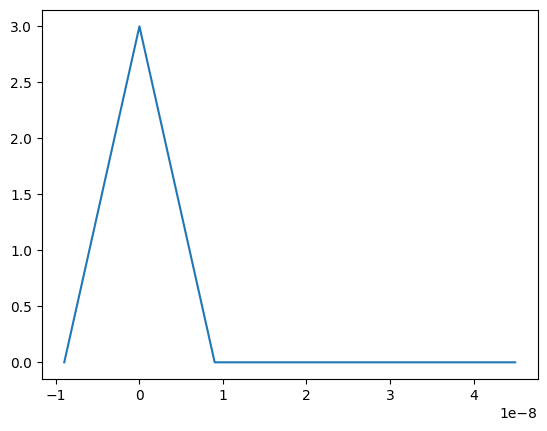

In [107]:
plt.plot(time_arr,value_arr)
#plt.plot(time_arr_b,value_arr_b)
plt.show()

Utility function to calculate integral of the pulse

In [108]:
def integral (values_arr, step):
    ret = 0.0
    for v in values_arr:
        ret = ret + v
    return ret * step

Create integral values for different pulse amplitudes 

In [109]:
# Apmlitude range 0 to 5 step 0.1
ampl_arr = np.arange(0, 5, 0.1, dtype=float)


#Set PMT pulse parameters
sigma=3.0 * 10**(-9)
tau = 9.0 * 10**(-9)

start_time = -3 * sigma
stop_time = 5 * tau
time_step = 0.01 * 10**(-9)

integral_arr = np.array([])

for a in ampl_arr:
    time_arr, value_arr = PMT_pulse_values (start_time, stop_time, time_step, a, sigma, tau)
    integral_arr = np.append(integral_arr, integral(value_arr, time_step))

   

Create limiting function 
th - input value threshold
gainA - linear gain for input values < th
gainB - linear gain for amplitudes > th

In [110]:
def limit_fun (input, gainA, gainB, th):
    if input<th:
        return input * gainA
    else:
        return th*gainA + (input-th) * gainB

Create limit function for array as input argumant

In [111]:
def limit_fun_4_arr (input_arr, gainA, gainB, th):
    ret_arr=np.array([])
    for i in input_arr:
        ret_arr = np.append(ret_arr, limit_fun(i, gainA, gainB, th))
    return ret_arr
    

Check plot for limiter

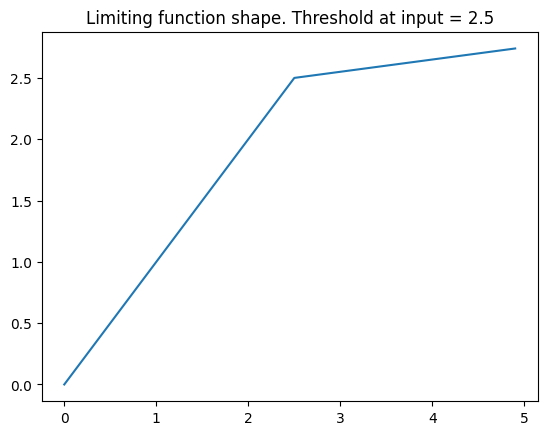

In [112]:
input_arr = np.arange(0, 5, 0.1)


gainA = 1.0
gainB = 0.1
th = 2.5

output_arr2 = limit_fun_4_arr(input_arr, gainA, gainB, th)

plt.title("Limiting function shape. Threshold at input = 2.5")
plt.plot(input_arr, output_arr2)
plt.show();


Create plot for limited pulse

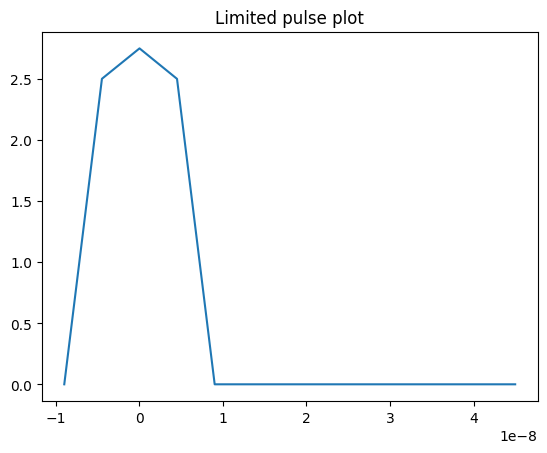

In [113]:
A = 5.0
sigma=3.0 * 10**(-9)
tau = 9.0 * 10**(-9)

start_time = -3 * sigma
stop_time = 5 * tau
time_step = 0.01 * 10**(-9)

time_arr, value_arr = PMT_pulse_values (start_time, stop_time, time_step, A, sigma, tau)
lim_value_arr = limit_fun_4_arr(value_arr, gainA, gainB, th)

plt.title("Limited pulse plot")
plt.plot(time_arr, lim_value_arr)
plt.show();


Create integral values for different pulse amplitudes 

In [114]:
# Apmlitude range 0 to 5 step 0.1
ampl_arr = np.arange(0, 5, 0.1, dtype=float)


#Set PMT pulse parameters
sigma=3.0 * 10**(-9)
tau = 9.0 * 10**(-9)

start_time = -3 * sigma
stop_time = 5 * tau
time_step = 0.01 * 10**(-9)

integral_arr = np.array([])

for a in ampl_arr:
    time_arr, value_arr = PMT_pulse_values (start_time, stop_time, time_step, a, sigma, tau)
    integral_arr = np.append(integral_arr, integral(value_arr, time_step))
    

Create integrals for limited amplitude pulses

In [115]:
lim_ampl_arr = np.arange(0, 5, 0.1, dtype=float)

gainA = 1.0
gainB = 0.3
th = 2.5

lim_integral_arr = np.array([])

for a in lim_ampl_arr:
    time_arr, value_arr = PMT_pulse_values (start_time, stop_time, time_step, a, sigma, tau)
    lim_value_arr = limit_fun_4_arr(value_arr, gainA, gainB, th)
    lim_integral_arr = np.append(lim_integral_arr, integral(lim_value_arr, time_step))




Plot integrals

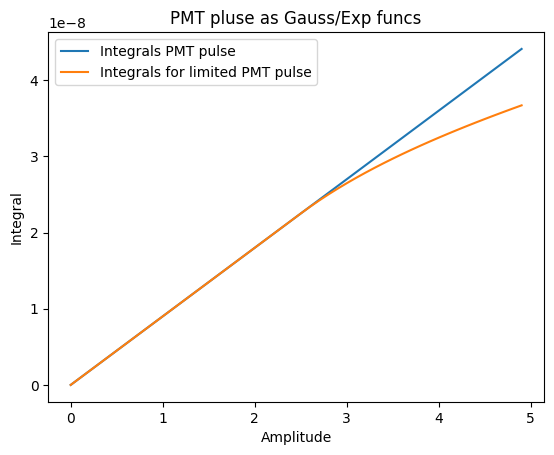

In [116]:
plt.plot(ampl_arr, integral_arr, label='Integrals PMT pulse')
plt.plot(lim_ampl_arr, lim_integral_arr, label='Integrals for limited PMT pulse')

plt.title("PMT pluse as Gauss/Exp funcs")
plt.xlabel("Amplitude")
plt.ylabel("Integral")
plt.legend()
plt.show()

Check/show inlinearity

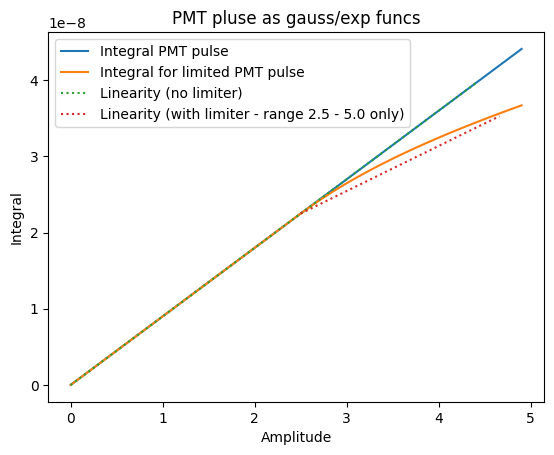

In [117]:
# start and end point of PMT function curve 
pointA = [ampl_arr[0], integral_arr[0]];
pointB = [ampl_arr[49], integral_arr[49]];

lin_fun_x=np.arange(pointA[0], pointB[0], abs(pointB[0]-pointA[0])/10 , dtype=float)
lin_fun_y=np.arange(pointA[1], pointB[1], abs(pointB[1]-pointA[1])/10, dtype=float)



# start and end point of function curve in a limited range 
pointA = [lim_ampl_arr[25], lim_integral_arr[25]];
pointB = [lim_ampl_arr[49], lim_integral_arr[49]];

lim_lin_fun_x=np.arange(pointA[0], pointB[0], abs(pointB[0]-pointA[0])/10 , dtype=float)
lim_lin_fun_y=np.arange(pointA[1], pointB[1], abs(pointB[1]-pointA[1])/10, dtype=float)


plt.plot(ampl_arr, integral_arr, label='Integral PMT pulse')
plt.plot(lim_ampl_arr, lim_integral_arr, label='Integral for limited PMT pulse')
plt.plot(lin_fun_x, lin_fun_y, label="Linearity (no limiter)", linestyle='dotted' )
plt.plot(lim_lin_fun_x, lim_lin_fun_y, label="Linearity (with limiter - range 2.5 - 5.0 only)", linestyle='dotted' )


plt.title("PMT pluse as gauss/exp funcs")
plt.xlabel("Amplitude")
plt.ylabel("Integral")


plt.legend()
plt.show()

